## 多签

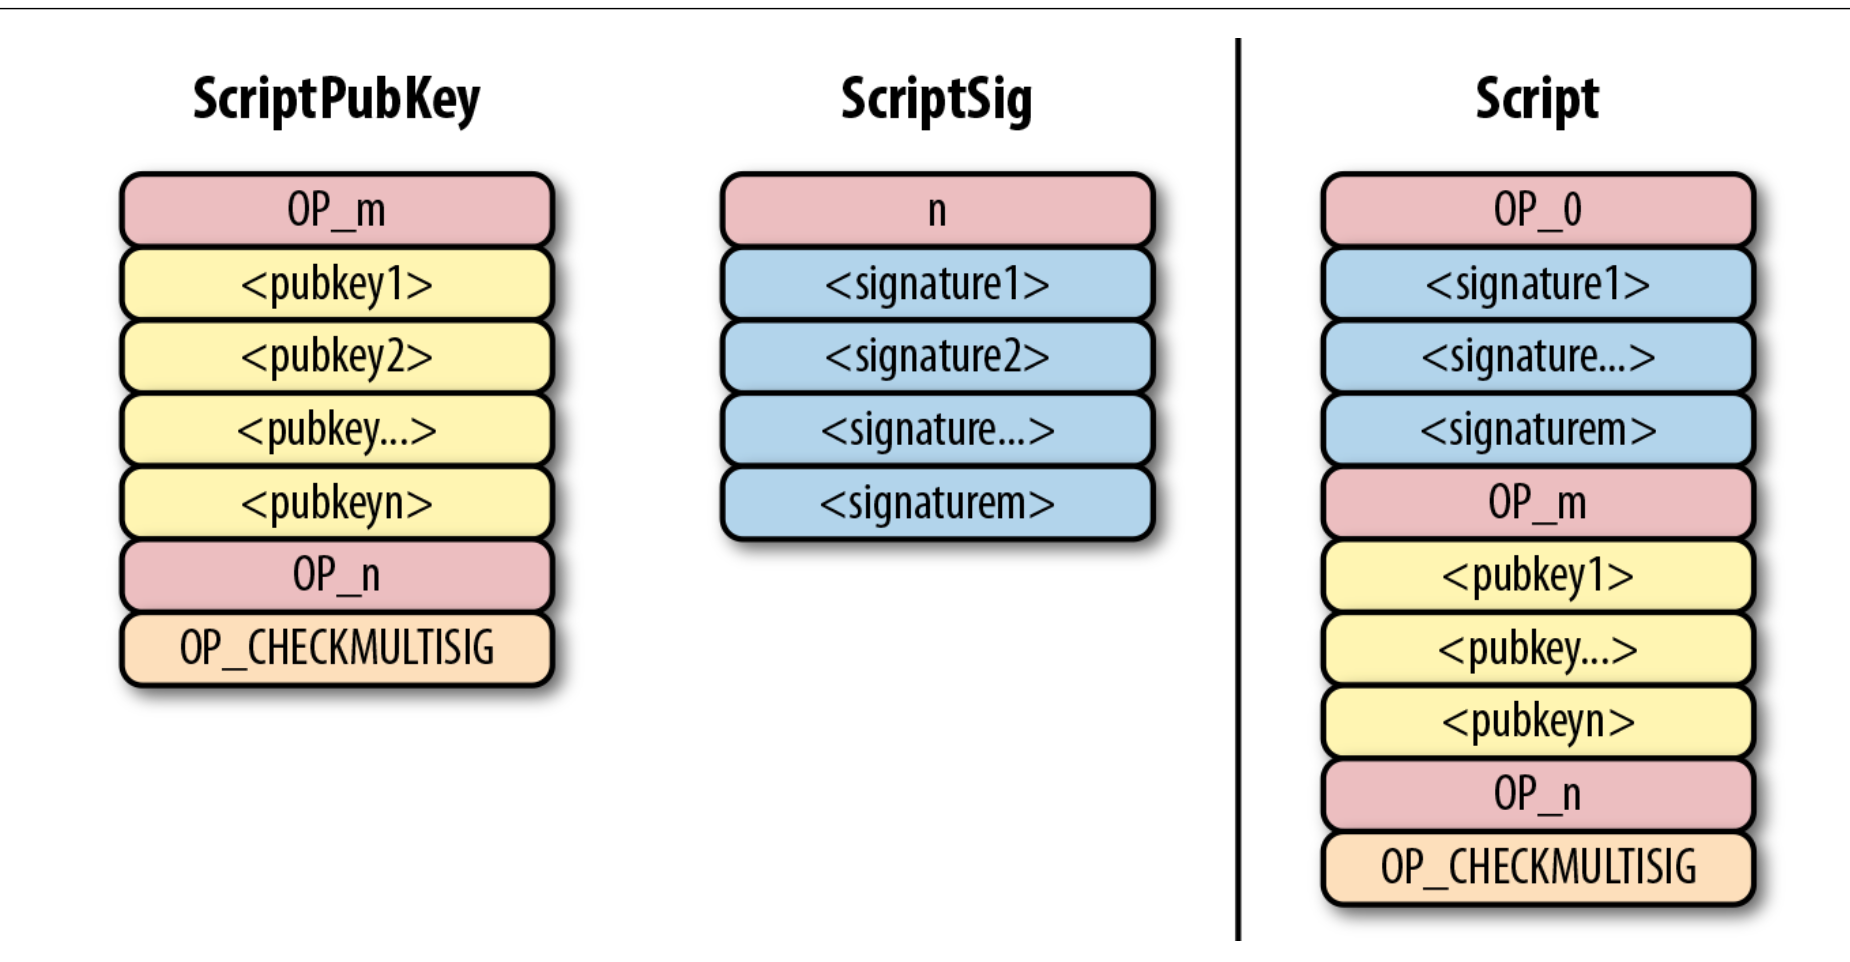


### P2SH
将script的Hash计算出来，然后在需要的时候显示原始的

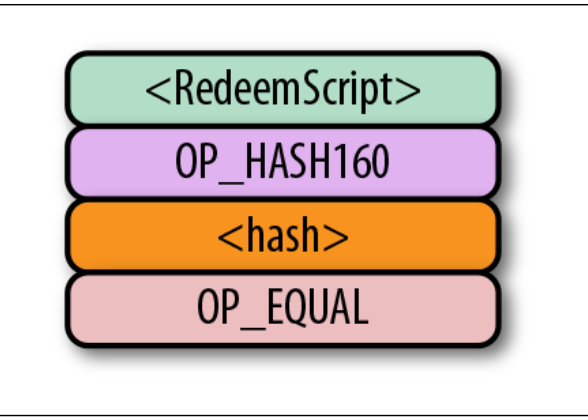

### 示例

2-2的多签

P2SH redeem script

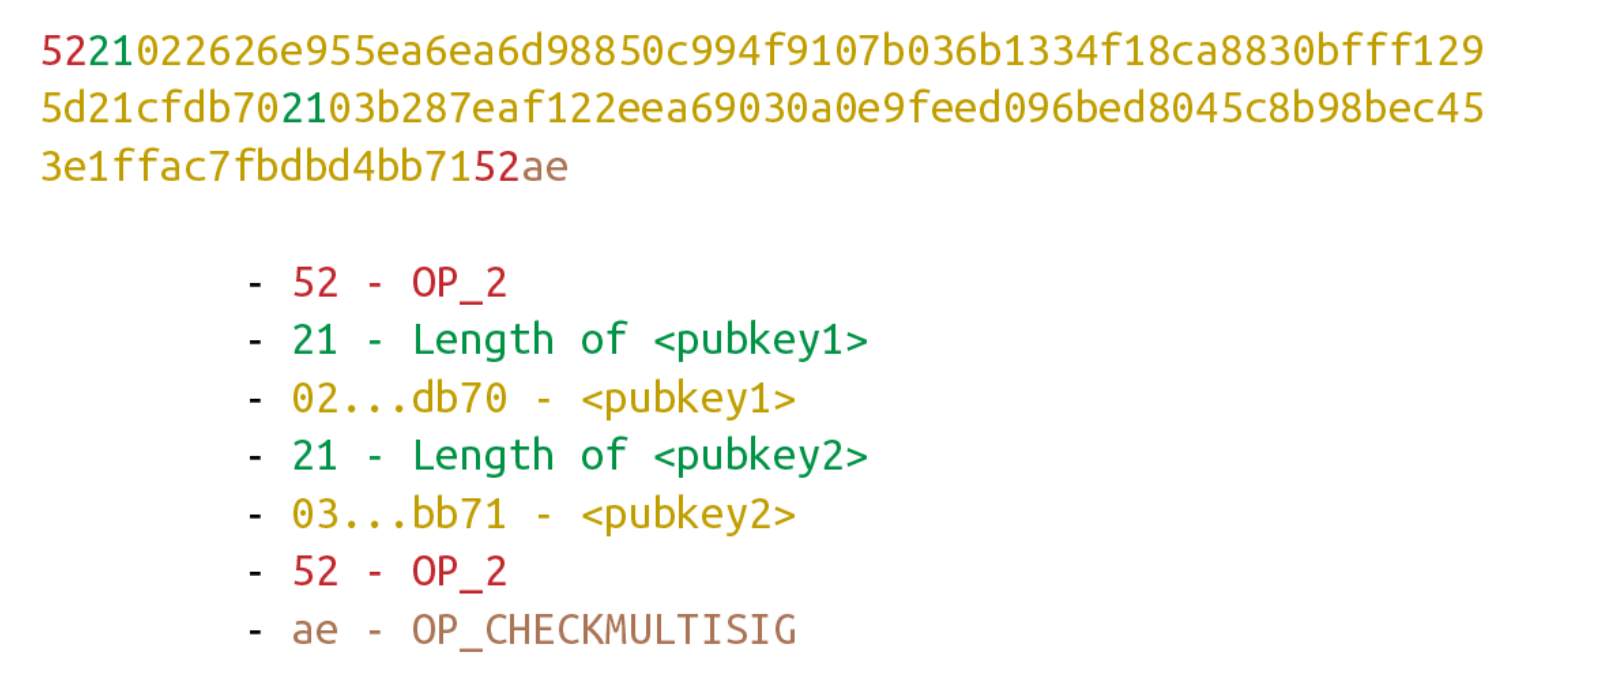

P2SH script public key

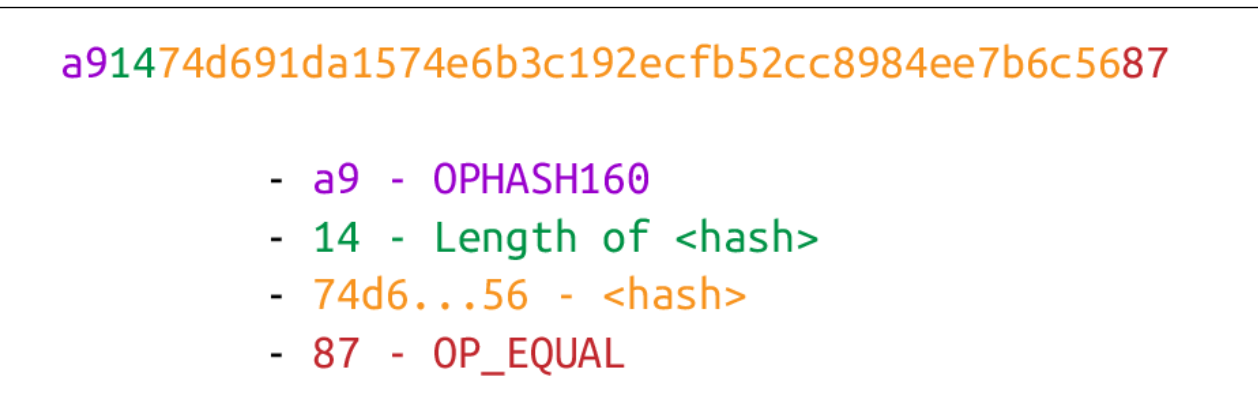

P2SH script signature

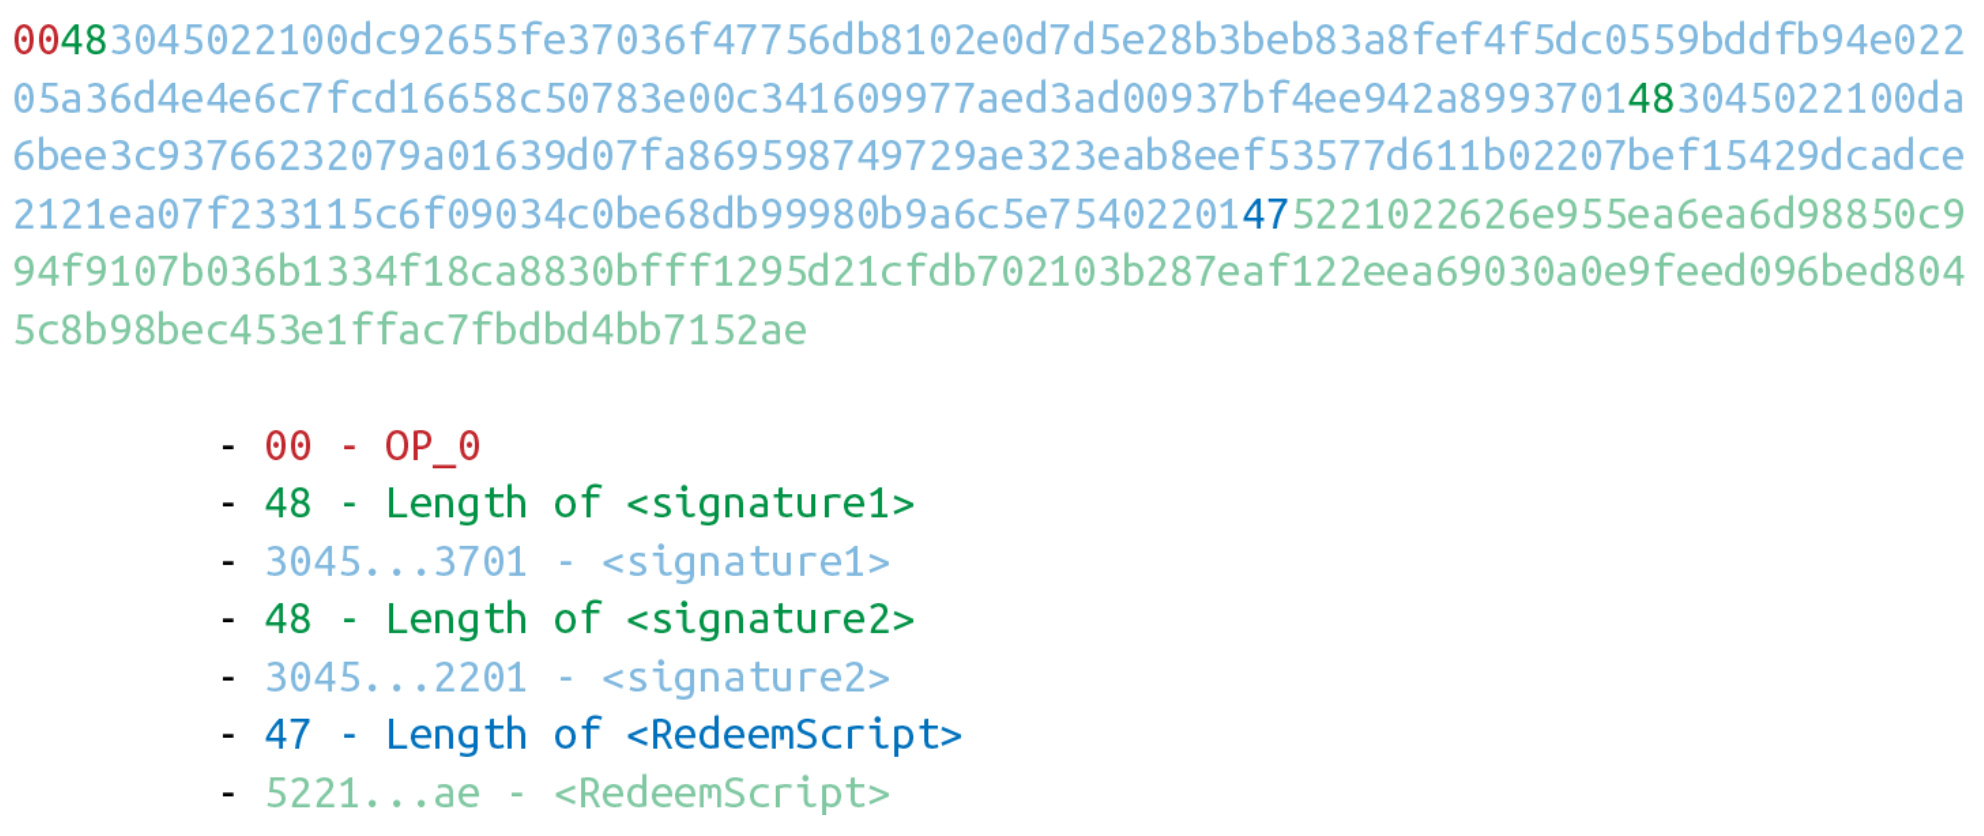

P2SH combined script

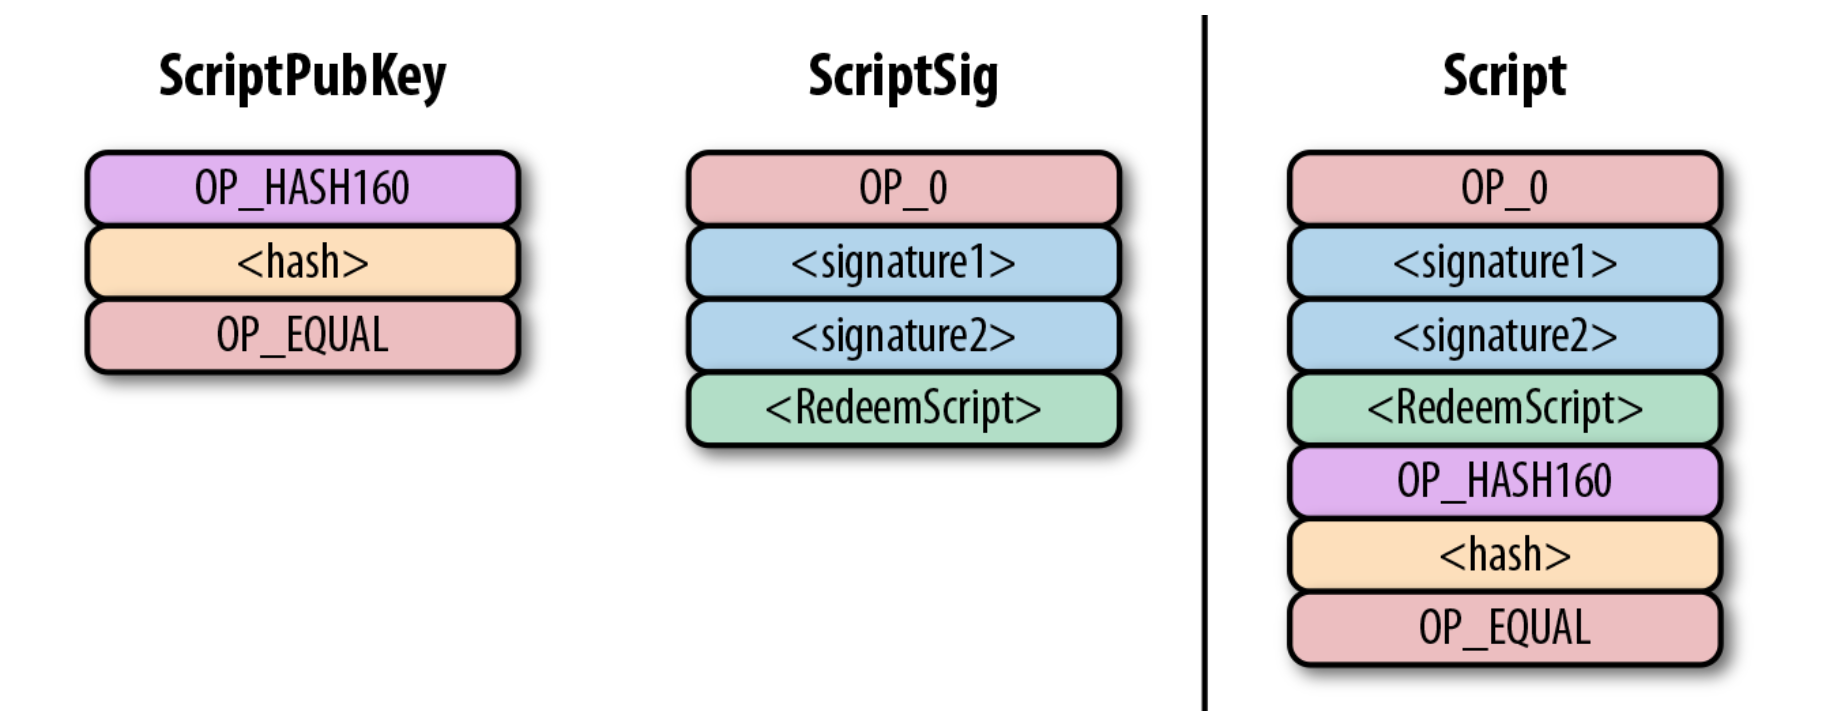


###  Address
prefix=b'\x05' if mainnet else b'\xc4'
encode_base58_checksum(prefix + h160)

In [1]:
# 验证p2sh交易

from helper import hash256
from ecc import S256Point,Signature
modified_tx = bytes.fromhex('0100000001868278ed6ddfb6c1ed3ad5f8181eb0c7a385aa0836f01d5e4789e6bd304d87221a000000475221022626e955ea6ea6d98850c994f9107b036b1334f18ca8830bfff1295d21cfdb702103b287eaf122eea69030a0e9feed096bed8045c8b98bec453e1ffac7fbdbd4bb7152aeffffffff04d3b11400000000001976a914904a49878c0adfc3aa05de7afad2cc15f483a56a88ac7f400900000000001976a914418327e3f3dda4cf5b9089325a4b95abdfa0334088ac722c0c00000000001976a914ba35042cfe9fc66fd35ac2224eebdafd1028ad2788acdc4ace020000000017a91474d691da1574e6b3c192ecfb52cc8984ee7b6c56870000000001000000')
s256 = hash256(modified_tx)
z = int.from_bytes(s256, 'big')
print(hex(z))
sec = bytes.fromhex('022626e955ea6ea6d98850c994f9107b036b1334f18ca8830bfff1295d21cfdb70')
der = bytes.fromhex('3045022100dc92655fe37036f47756db8102e0d7d5e28b3beb83a8fef4f5dc0559bddfb94e02205a36d4e4e6c7fcd16658c50783e00c341609977aed3ad00937bf4ee942a89937')
print(123)
point = S256Point.parse(sec)
sig = Signature.parse(der)
print(sig)
point.verify(z, sig)

0xe71bfa115715d6fd33796948126f40a8cdd39f187e4afb03896795189fe1423c
123
Signature(dc92655fe37036f47756db8102e0d7d5e28b3beb83a8fef4f5dc0559bddfb94e,5a36d4e4e6c7fcd16658c50783e00c341609977aed3ad00937bf4ee942a89937)


False

## P2WKPH

### Transaction Malleability

Transaction ID的生成是Transaction中各个字段序列化之后的hash值。但是由于input ScriptSig不参与signature的生成，所以修改ScriptSig未
必会使得签名失效。这就导致了Transaction ID不能准确唯一的代表一个Transaction，因为如果Transaction只有签名不同，就会有不同的TransactionID，但是这些Transaction可能是同一笔交易。

### Witness如何解决这个问题？
witness将input的ScriptSig挪到了witness字段，保证TransactionID能够唯一确定的代表一个Transaction.

pre-BIP0141:

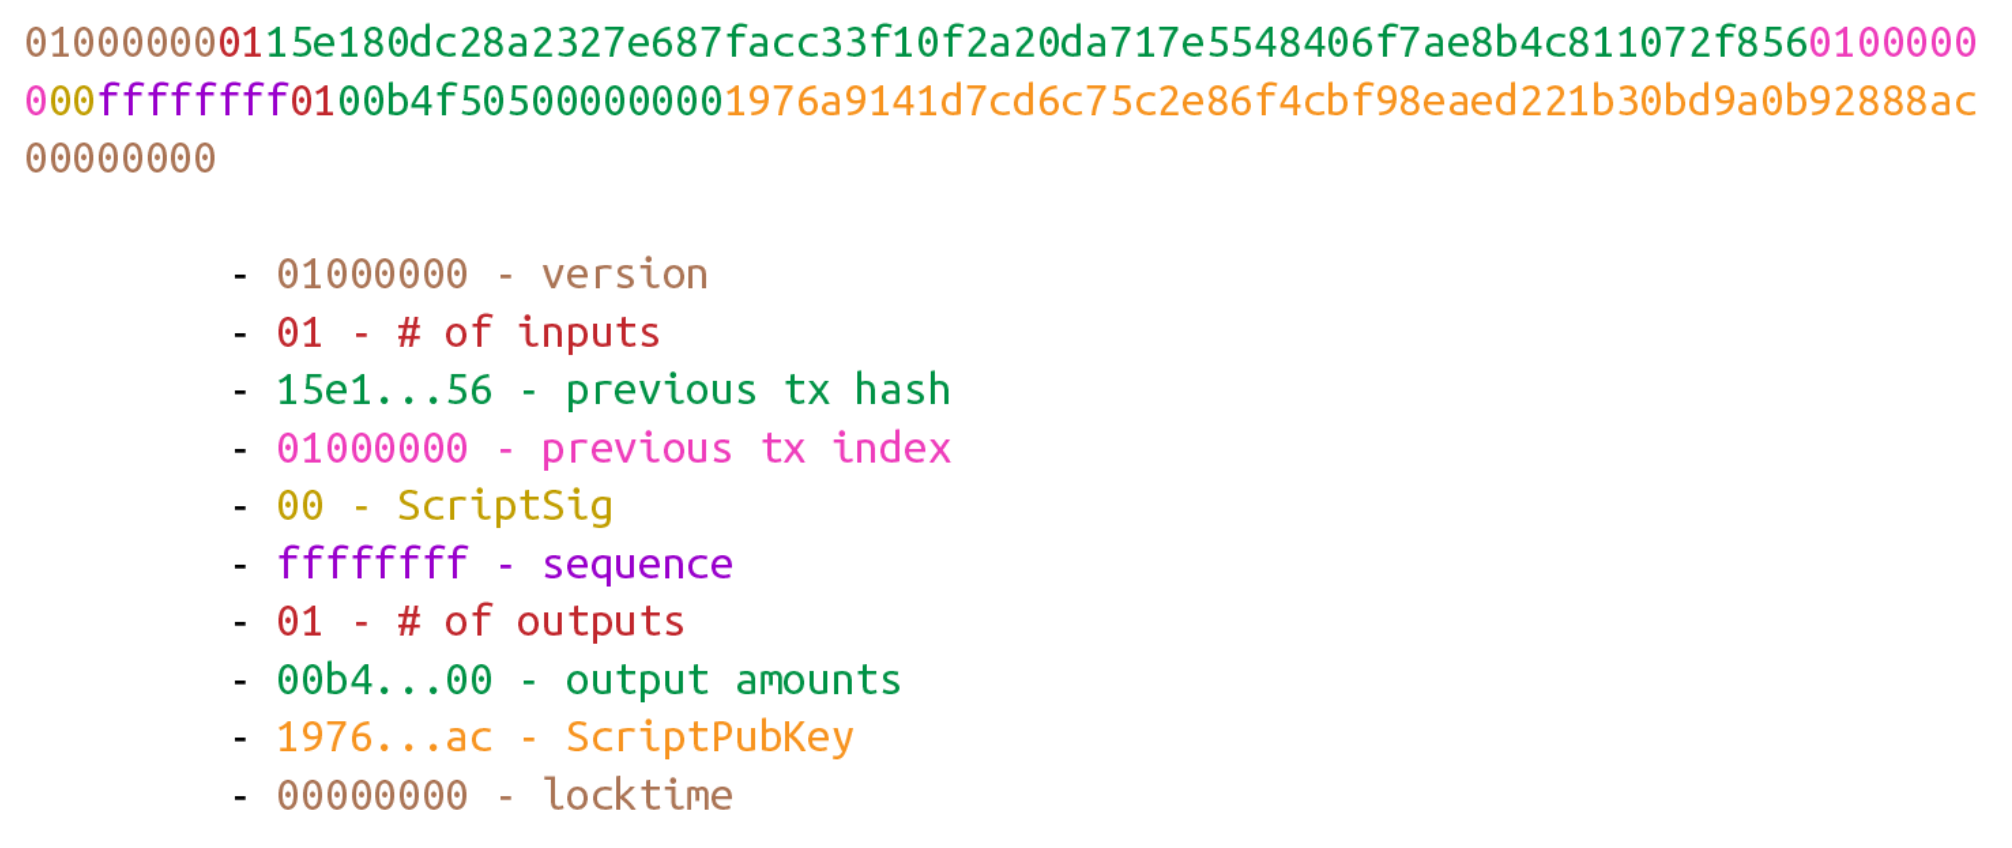

post-BIP0141:

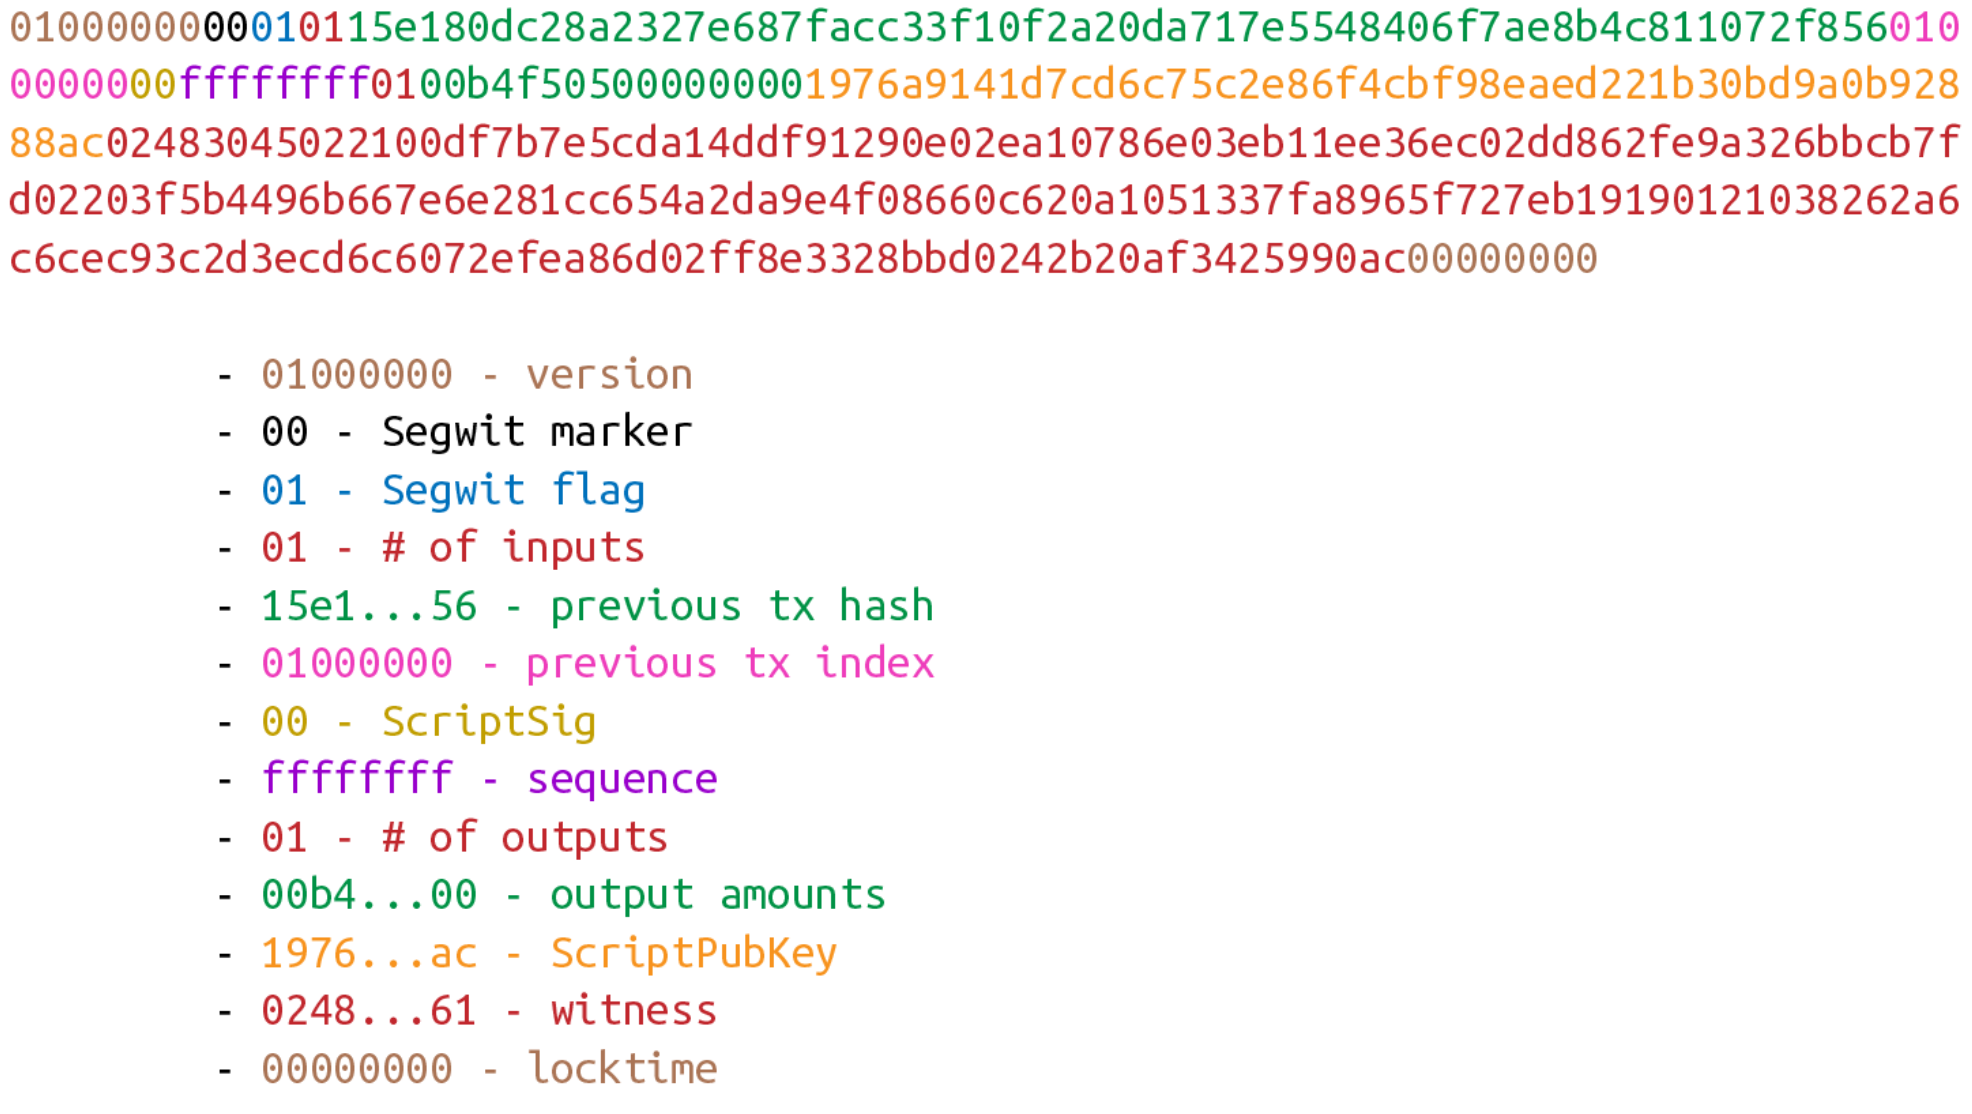

combined script:

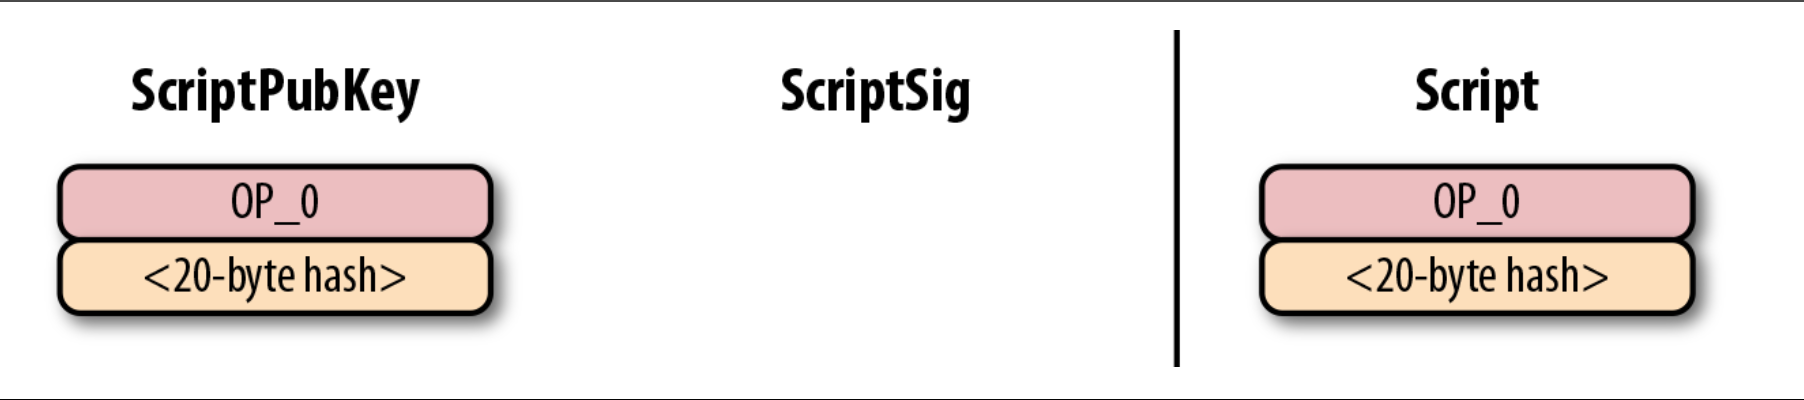

p2wpkh script rule: OP_0 <20-byte hash>

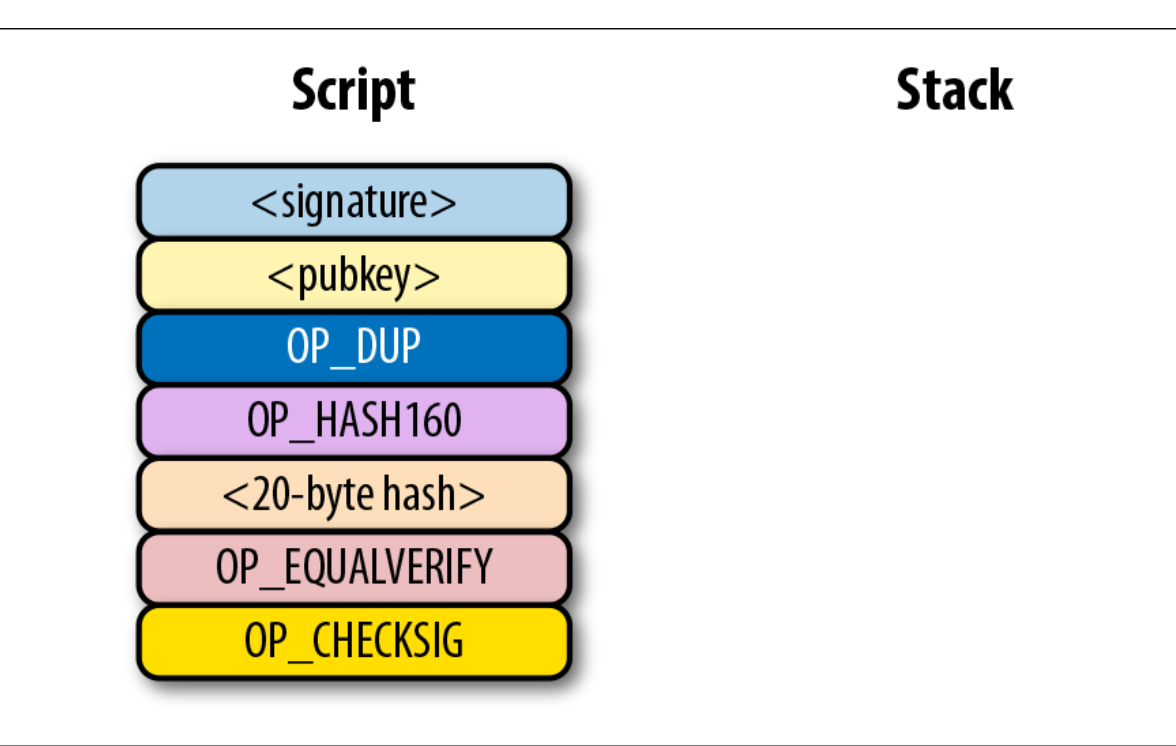

### p2sh-p2wpkh

pre-BIP0141:

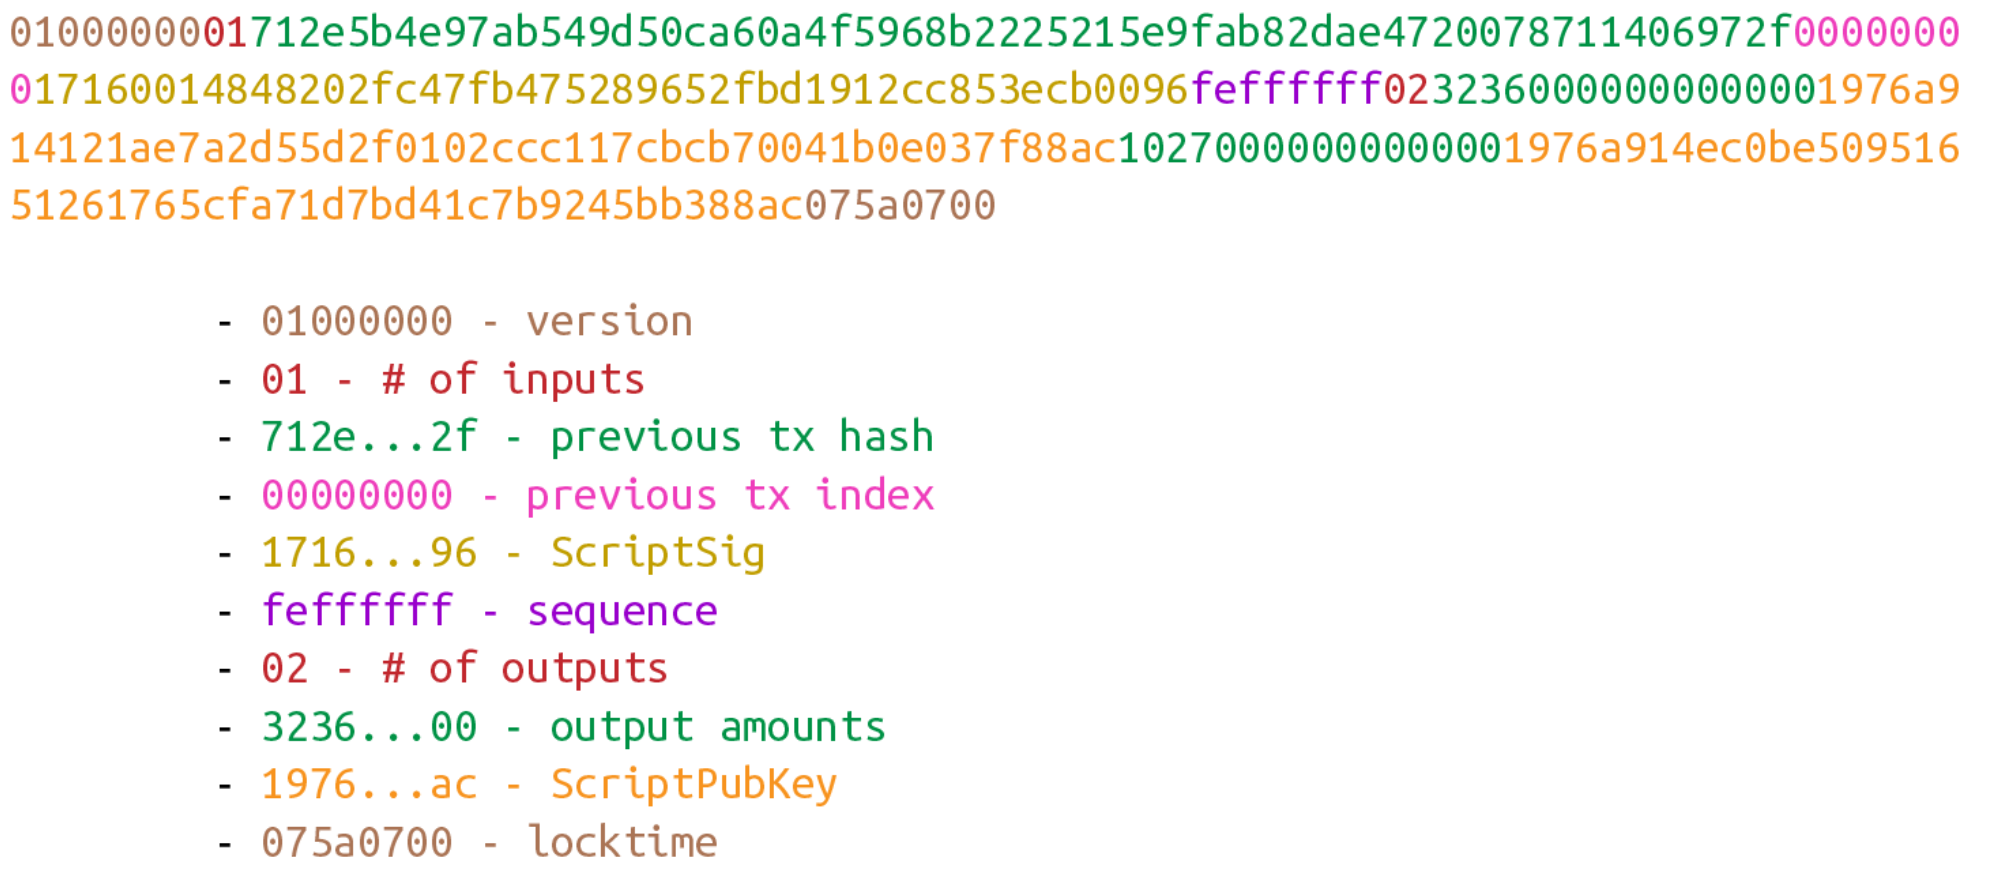

post-BIP0141:

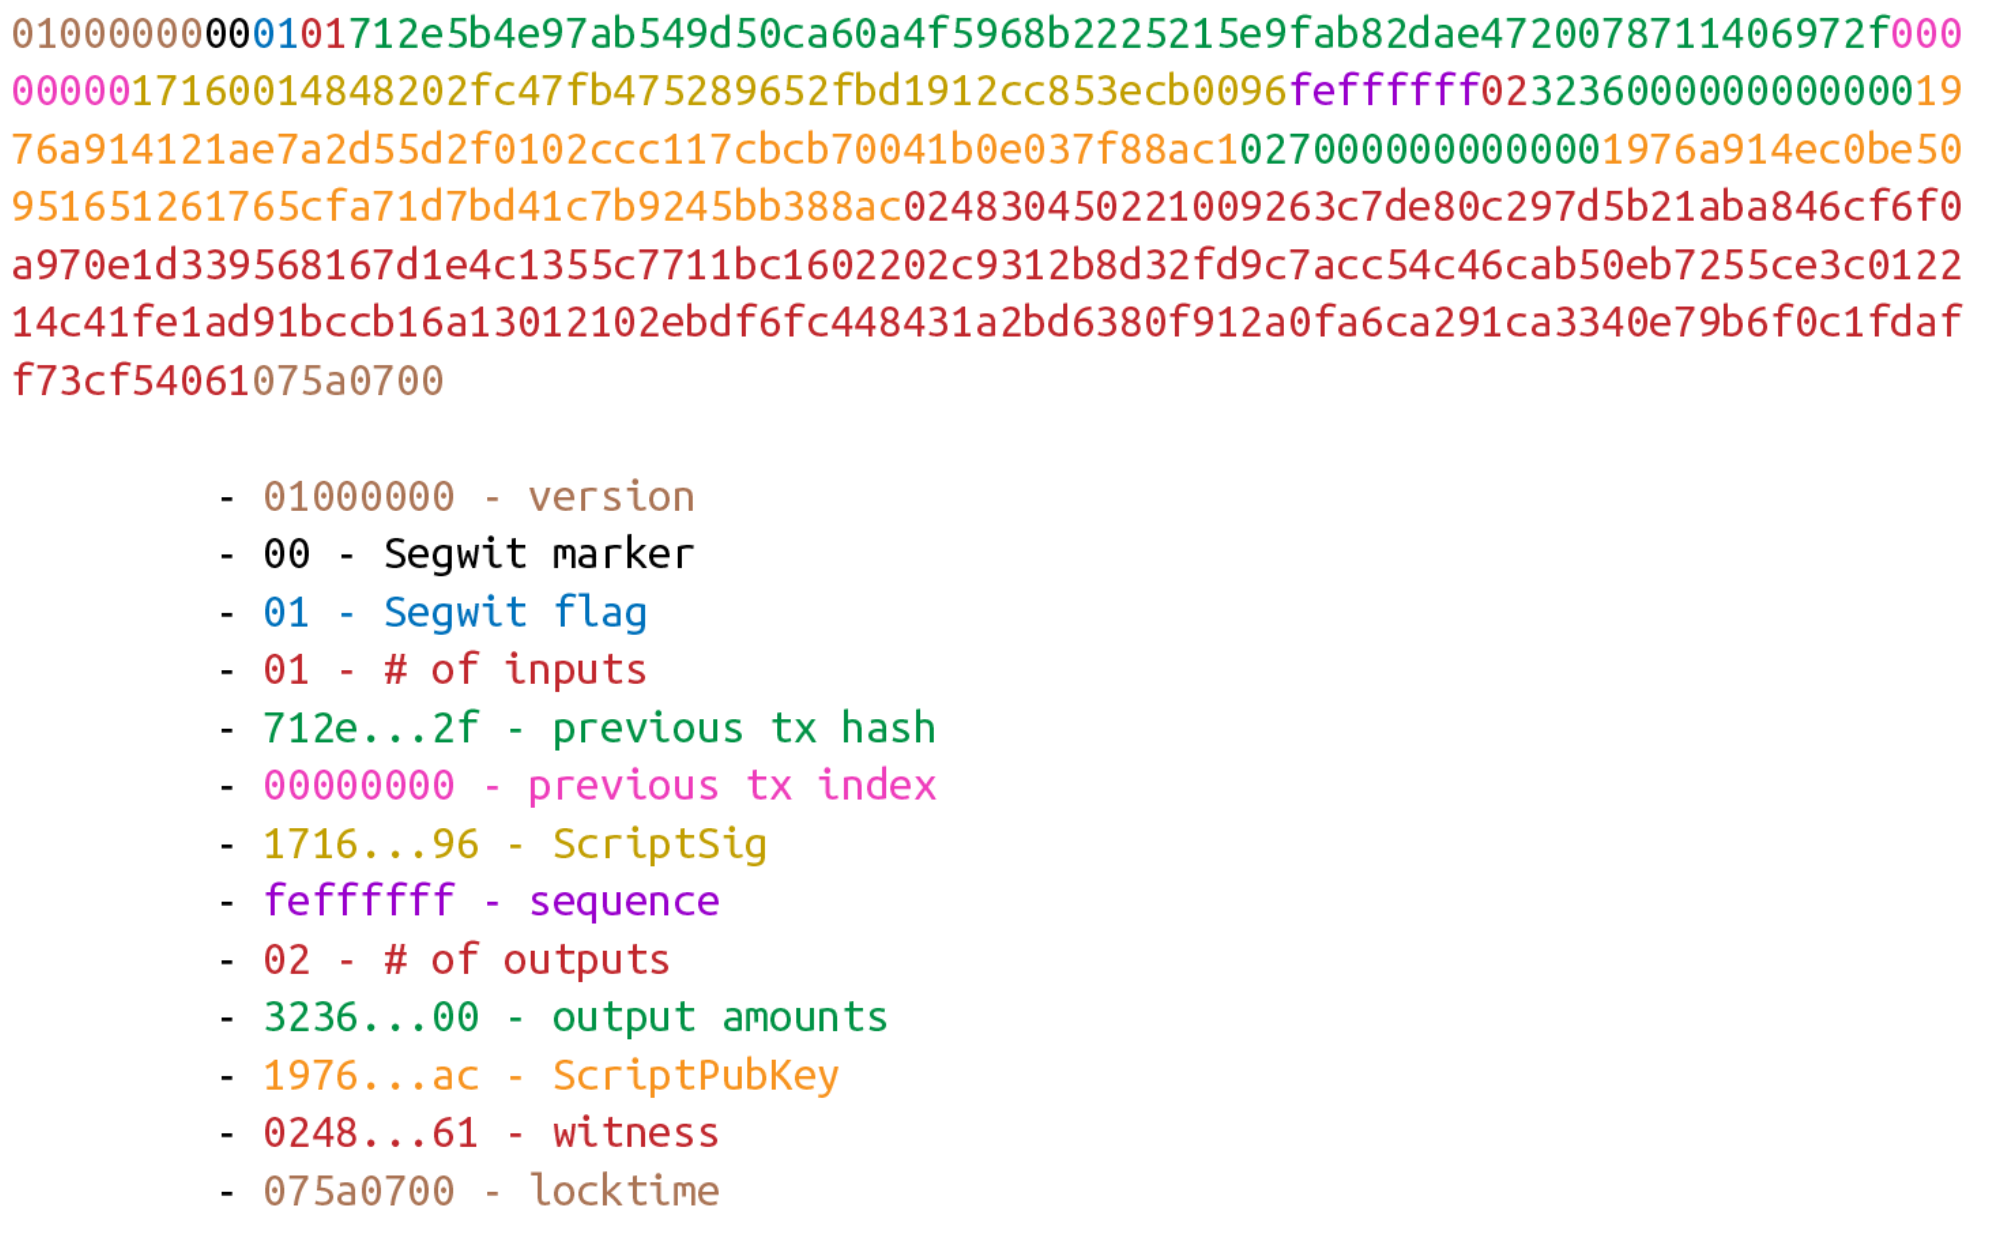

script的执行过程:

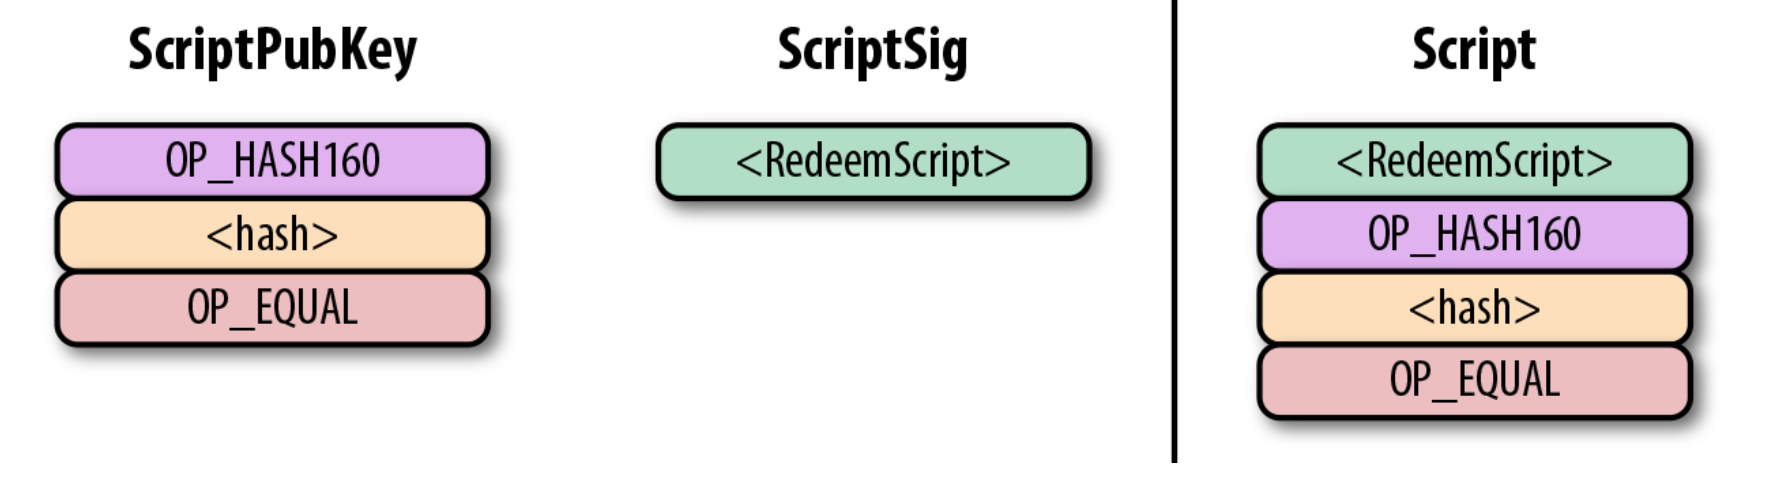

当这个script执行结束的时候，post-BIP0016 会识别到这是一个P2SH的序列，然后，redeem script会被展开成如下格式：

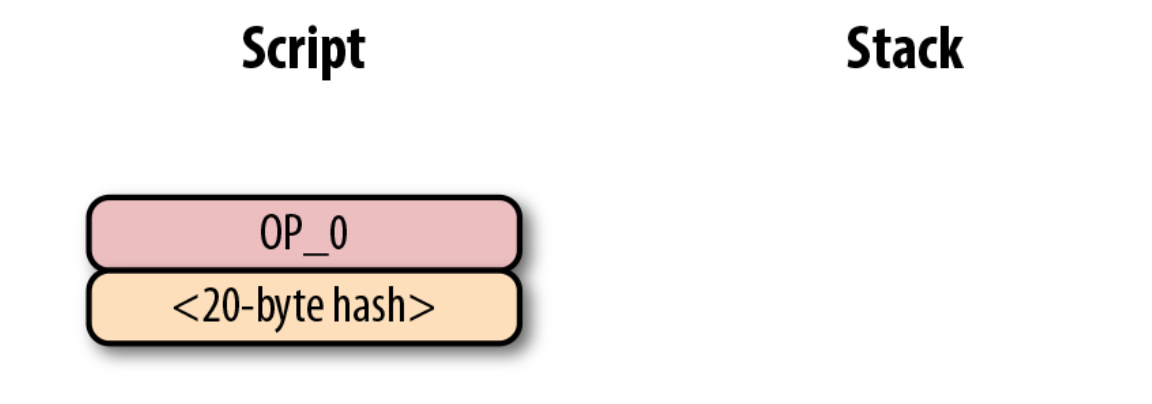

post-BIP0141 会识别到这是一个P2WPKH的序列，然后会将witness的数据展开：

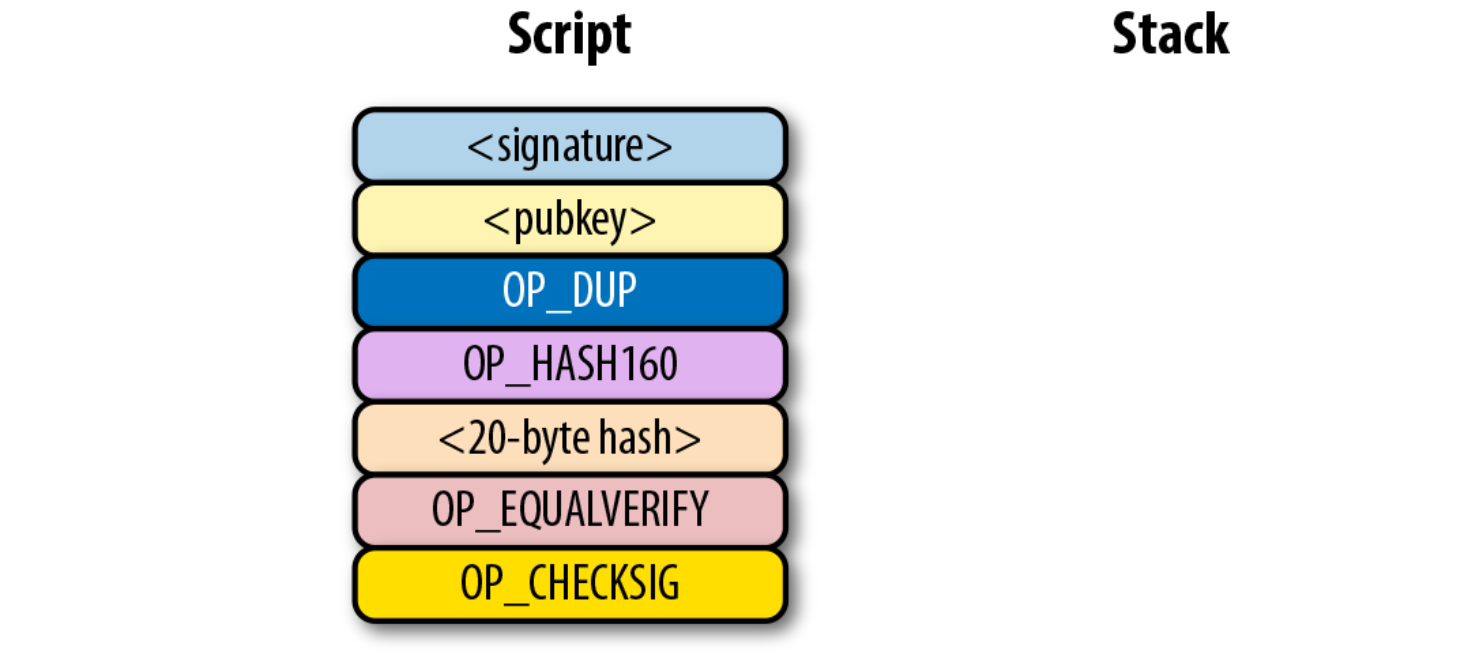
